### In this chapter, you will learn how to work with NAIP multi-band raster data stored in .tif format in Python using rasterio.

- Open an RGB image with 3-4 bands in Python using rioxarray.
- Identify the number of bands stored in a multi-band raster in Python.
- Plot various band composites in Python including True Color (RGB), and Color Infrared (CIR) color images.

NAIP imagery is often collected with just a red, green and Blue band. However, some flights include a near infrared band which is very useful for quantifying vegetation cover and health.

Next, you will use NAIP imagery for the Coldsprings fire study area in Colorado. To work with multi-band raster data you will use the rioxarray and geopandas packages. You will also use the plot module from the earthpy package for raster plotting.m¡

In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
import rioxarray as rxr
import geopandas as gpd
import earthpy as et
import earthpy.plot as ep
import earthpy.spatial as es

# Get the data
data = et.data.get_data('cold-springs-fire')

# Set working directory
os.chdir(os.path.join(et.io.HOME, 'earth-analytics', 'data'))

plt.rcParams['figure.figsize'] = (10, 10)
plt.rcParams['axes.titlesize'] = 20

Extracted output to C:\Users\34639\earth-analytics\data\cold-springs-fire\.


#### rxr.open_rasterio("path-to-tif-file-here")

Don’t forget that with rioxarray you can automatically mask out the fill values of a raster with the argument masked=True in open_rasterio.m

In [3]:
naip_csf_path = os.path.join("cold-springs-fire", 
                             "naip", 
                             "m_3910505_nw_13_1_20150919", 
                             "crop", 
                             "m_3910505_nw_13_1_20150919_crop.tif")

naip_csf = rxr.open_rasterio(naip_csf_path, masked=True)
naip_csf

<xarray.DataArray (band: 4, y: 2312, x: 4377)>
[40478496 values with dtype=float32]
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 4.572e+05 4.572e+05 ... 4.615e+05 4.615e+05
  * y            (y) float64 4.427e+06 4.427e+06 ... 4.425e+06 4.425e+06
    spatial_ref  int32 0
Attributes:
    STATISTICS_MAXIMUM:  239
    STATISTICS_MEAN:     nan
    STATISTICS_MINIMUM:  32
    STATISTICS_STDDEV:   nan
    scale_factor:        1.0
    add_offset:          0.0

Above you imported a geotiff like you’ve done before. But this file is different. Notice the shape of the resulting numpy array. How many layers (known as bands) does it have?

In [4]:
naip_csf.shape

(4, 2312, 4377)

Just like you’ve done before, you can plot a single band in the NAIP raster using imshow(). However, now that you have multiple layers or bands, you need to tell imshow() what layer you wish to plot. Use arrayname[0] to plot the first band of the image.

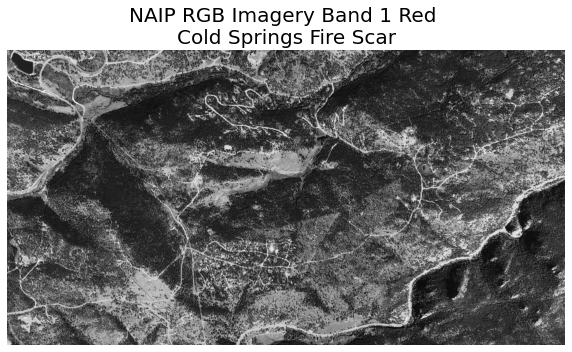

In [9]:
# plot first band pyplot matplotlib
fig, ax = plt.subplots()

ax.imshow(naip_csf[0], 
          cmap="Greys_r")
ax.set_title("NAIP RGB Imagery Band 1 Red \nCold Springs Fire Scar")
ax.set_axis_off()
plt.show()

Or you can use the earthpy function plot_bands(). Note that in this lesson, you will first be shown how to use earthpy to plot multiband rasters. The earthpy package was developed to make it easier to work with spatial data in Python.

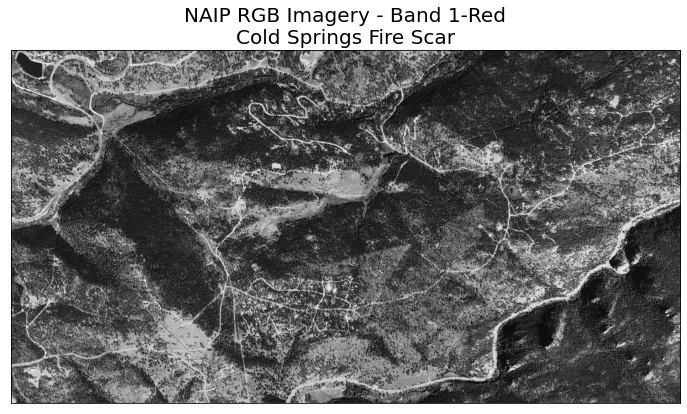

In [10]:
# plot raster with earthpy
ep.plot_bands(naip_csf[0],
              title="NAIP RGB Imagery - Band 1-Red\nCold Springs Fire Scar",
              cbar=False)
plt.show()

#### Image Raster Data Values
Next, examine the raster’s min and max values. What is the value range?



In [11]:
# View min and max value
print(naip_csf.min())
print(naip_csf.max())

<xarray.DataArray ()>
array(17., dtype=float32)
Coordinates:
    spatial_ref  int32 0
<xarray.DataArray ()>
array(242., dtype=float32)
Coordinates:
    spatial_ref  int32 0


This raster contains values between 0 and 255. These values represent degrees of brightness associated with the image band. In the case of a RGB image (red, green and blue), band 1 is the red band. When we plot the red band, larger numbers (towards 255) represent pixels with more red in them (a strong red reflection). Smaller numbers (towards 0) represent pixels with less red in them (less red was reflected).



To plot an RGB image, we mix red + green + blue values, using the ratio of each. The ratio of each color is determined by how much light was recorded (the reflectance value) in each band. This mixture creates one single color that, in turn, makes up the full color image - similar to the color image that your camera phone creates.

### 8 vs 16 Bit Images
It’s important to note that this image is an 8 bit image. This means that all values in the raster are stored within a range of 0:255. This differs from a 16-bit image, in which values can be stored within a range of 0:65,535.

In these lessons, you will work with 8-bit images. For 8-bit images, the brightest whites will be at or close to 255. The darkest values in each band will be closer to 0.

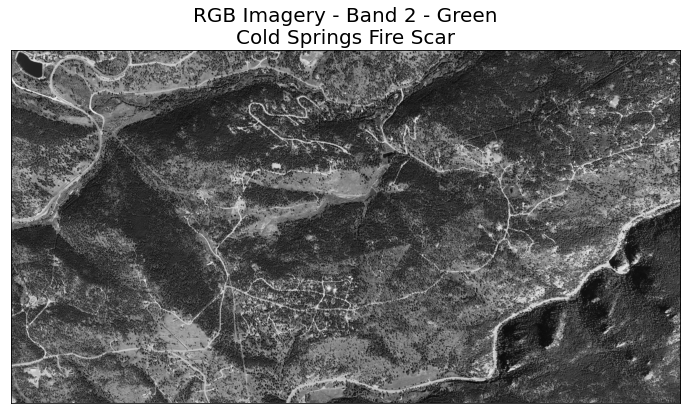

In [12]:
# Plot band 2 - green
ep.plot_bands(naip_csf[1],
              title="RGB Imagery - Band 2 - Green\nCold Springs Fire Scar",
              cbar=False)
plt.show()

## Rasters and Numpy Arrays - A Review
Remember that when you import a raster dataset into Python, the data are converted to an xarray object. A numpy array has no inherent spatial information attached to it, nor does an xarray object. The data are just a matrix of values. This makes processing the data fast.

The spatial information for the raster is stored in a .rio attribute which is available if you import rioxarray in your workflow. This rio attribute allows you to export the data as a geotiff or other spatial format.

#### Plot Raster Band Images
Next plot each band in the raster. This is another intermediate step (like plotting histograms) that you might want to do when you first explore and open your data.

Earthpy contains a plot_bands() function that allows you to quickly plot each band individually.

#### Plot Bands Using Earthpy
You can use the earthpy package to plot a single or all bands in your array. To use earthpy call:

##### ep.plot_bands()

plot_bands() takes several key agruments including:

- **arr:** an n-dimensional numpy array to plot.
- **figsize:** a tuple of 2 values representing the x and y dimensions of the image.
- **cols**: if you are plotting more than one band you can specify the number of columns in the grid that you’d like to plot.
- **title:** OPTIONAL - A single title for one band or a list of x titles for x bands in your array.
- **cbar:** OPTIONAL - ep.plot_bands() by default will add a colorbar to each plot it creates. You can turn the colobar off by setting this argument to false.

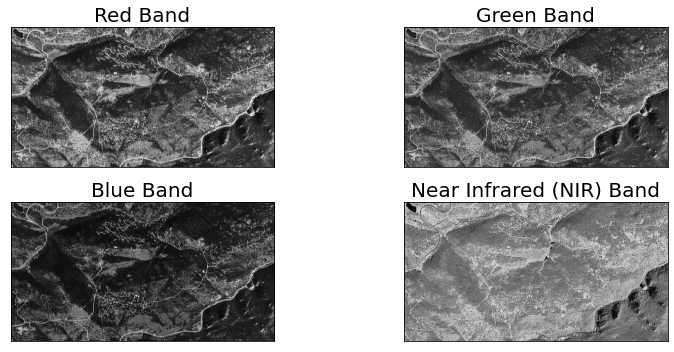

In [13]:
titles = ["Red Band", "Green Band", "Blue Band", "Near Infrared (NIR) Band"]

# Plot all bands using the earthpy function
ep.plot_bands(naip_csf, 
              figsize=(12, 5), 
              cols=2,
              title=titles,
              cbar=False) # turn the colorbar off
plt.show()

## Plot RGB Data in Python

You can use the Earthpy function called **plot_rgb()** to quickly plot 3 band composite images. This function has several key arguments including

- arr: a numpy array in rasterio band order (bands first)
- rgb: the three bands that you wish to plot on the red, green and blue channels respectively
- title: OPTIONAL - if you want to add a title to your plot.

Similar to plotting with geopandas, you can provide an ax= argument as well to plot your data on a particular matplotlib axis.

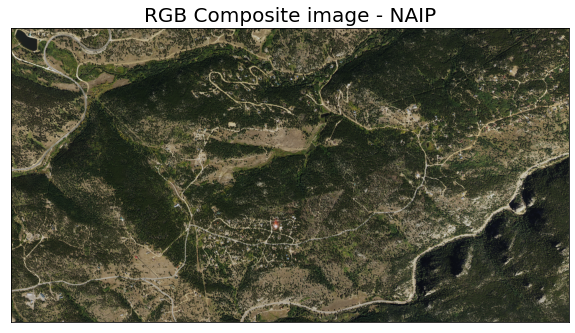

In [15]:
ep.plot_rgb(naip_csf.values, # arr: a numpy array in rasterio band order (bands first)
            rgb=[0, 1, 2],
            title="RGB Composite image - NAIP")
plt.show()

Optionally, you can also provide the bands that you wish to plot, the title and the figure size.



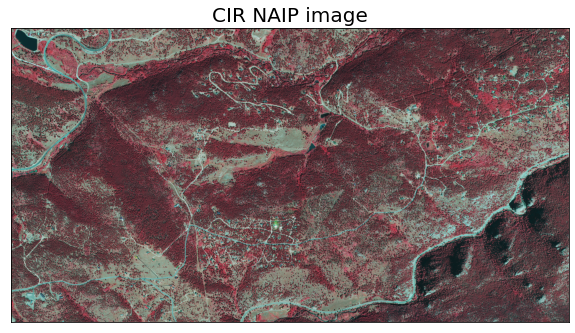

In [16]:
ep.plot_rgb(naip_csf.values, title="CIR NAIP image",
            rgb=[3, 0, 1],
            figsize=(10, 8))
plt.show()

### Optional Challenge: Making Sense of Single Band Images
Plot all of the bands in the NAIP image using python, following the code examples above. Compare grayscale plots of band 1 (red), band 2 (green) and band 4 (near infrared). Is the forested area darker or lighter in band 2 (the green band) compared to band 1 (the red band)?

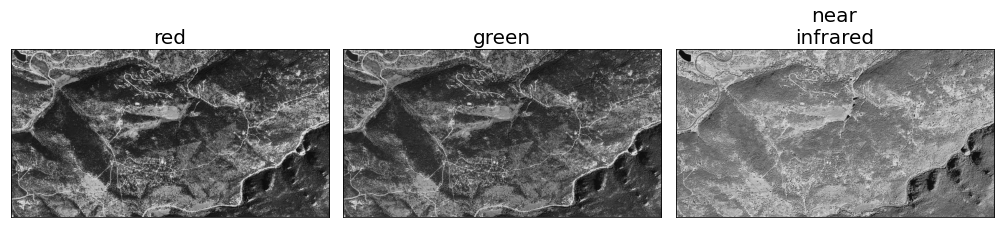

In [23]:
titles = ['red', 'green', 'near\ninfrared']
ep.plot_bands(naip_csf[[0, 1, 3]], # arg, orddre de las bandes
              figsize=(14, 12),
              cols=3,
              title=titles,
              cbar=False)
plt.show()

More dark in red green. 

### Image Stretch To Increase Contrast
The image above looks pretty good. You can explore whether applying a stretch to the image improves clarity and contrast.

![Stretch](./img/stretch.jpg)

When the range of pixel brightness values is closer to 0, a darker image is rendered by default. You can stretch the values to extend to the full 0-255 range of potential values to increase the visual contrast of the image.

Below you use the skimage package to contrast stretch each band in your data to make the whites more bright and the blacks more dark.

In the example below you only stretch bands 0,1 and 2 which are the RGB bands. To begin,

- preallocate an array of zeros that is the same shape as your numpy array.
- then look through each band in the image and rescale it.

https://scikit-image.org/docs/dev/auto_examples/color_exposure/plot_equalize.html
    

For convenience we have also built a stretch feature into earthpy. You can call it using the stretch argument.

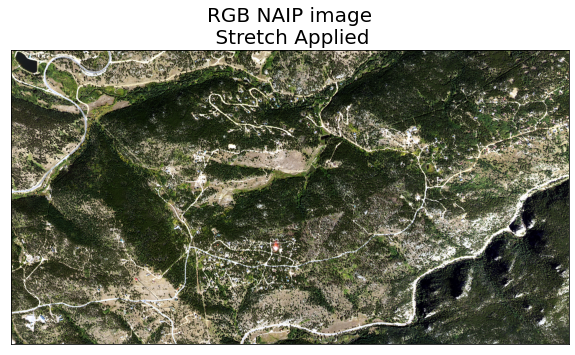

In [26]:
band_indices = [0, 1, 2]

# Apply stretch using the earthpy plot_rgb function
ep.plot_rgb(naip_csf.values,
            rgb=band_indices,
            title="RGB NAIP image\n Stretch Applied",
            figsize=(10, 8),
            stretch=True)
plt.show()

### Multiband Raster Histograms
Just like you did with single band rasters, you can view a histogram of each band in your data using matplotlib. Below, you loop through each band or layer in the number array and plot the distribution of reflectance values.

You can use the ep.hist() function in earthpy to plot histograms for all bands in your raster. hist() accepts several key arguments including

- arr: a numpy array in rasterio band order (bands first)
- colors: a list of colors to use for each histogram.
- title: plot titles to use for each histogram.
- cols: the number of columns for the plot grid.

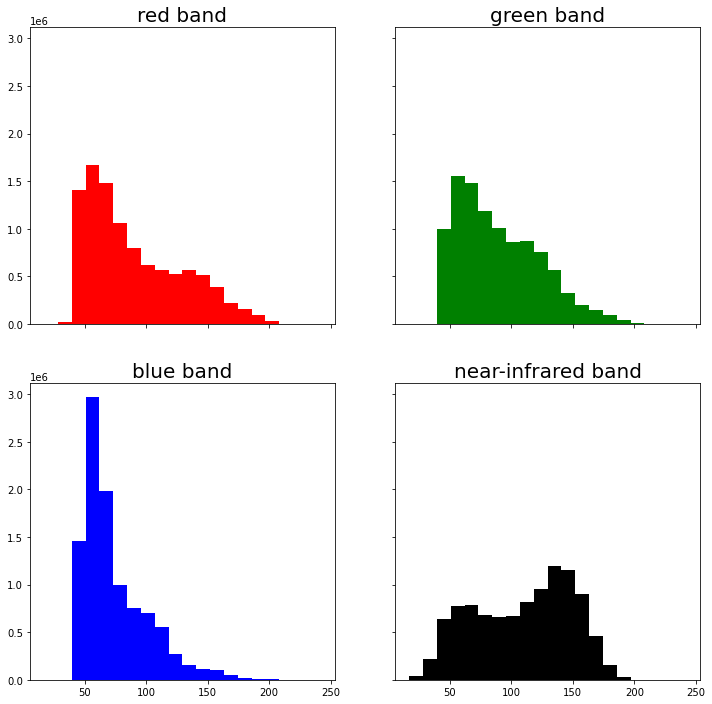

In [27]:
# Create a colors and titles list to use in the histogram, then plot
colors = ['r', 'g', 'b', 'k']
titles = ['red band', 'green band', 'blue band', 'near-infrared band']

ep.hist(naip_csf.values, 
        colors=colors, 
        title=titles, 
        cols=2)

plt.show()

In [28]:
naip_csf.values

array([[[113., 117., 137., ...,  54.,  51.,  74.],
        [113., 117., 131., ...,  63.,  54.,  54.],
        [111., 117., 120., ...,  78.,  76.,  52.],
        ...,
        [191., 192., 193., ...,  58.,  69.,  76.],
        [192., 192., 193., ...,  53.,  62.,  71.],
        [193., 193., 193., ...,  51.,  59.,  66.]],

       [[114., 114., 126., ...,  58.,  54.,  72.],
        [114., 112., 120., ...,  70.,  60.,  58.],
        [111., 114., 115., ...,  85.,  87.,  58.],
        ...,
        [183., 184., 185., ...,  61.,  75.,  84.],
        [184., 185., 185., ...,  56.,  66.,  78.],
        [186., 186., 186., ...,  52.,  58.,  65.]],

       [[ 80.,  87.,  95., ...,  55.,  54.,  63.],
        [ 79.,  83.,  90., ...,  57.,  55.,  55.],
        [ 81.,  84.,  87., ...,  62.,  65.,  55.],
        ...,
        [161., 161., 163., ...,  54.,  58.,  64.],
        [162., 164., 165., ...,  53.,  58.,  62.],
        [165., 166., 166., ...,  51.,  54.,  57.]],

       [[145., 143., 139., ...,  74.,

In [29]:
naip_csf

<xarray.DataArray (band: 4, y: 2312, x: 4377)>
array([[[113., 117., ...,  51.,  74.],
        [113., 117., ...,  54.,  54.],
        ...,
        [192., 192., ...,  62.,  71.],
        [193., 193., ...,  59.,  66.]],

       [[114., 114., ...,  54.,  72.],
        [114., 112., ...,  60.,  58.],
        ...,
        [184., 185., ...,  66.,  78.],
        [186., 186., ...,  58.,  65.]],

       [[ 80.,  87., ...,  54.,  63.],
        [ 79.,  83., ...,  55.,  55.],
        ...,
        [162., 164., ...,  58.,  62.],
        [165., 166., ...,  54.,  57.]],

       [[145., 143., ...,  47.,  65.],
        [145., 146., ...,  59.,  57.],
        ...,
        [170., 171., ...,  81., 105.],
        [173., 173., ...,  55.,  67.]]], dtype=float32)
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 4.572e+05 4.572e+05 ... 4.615e+05 4.615e+05
  * y            (y) float64 4.427e+06 4.427e+06 ... 4.425e+06 4.425e+06
    spatial_ref  int32 0
Attributes:
    STATISTICS_MAXIMUM:  239
    STATISTICS_MEAN:     nan
    STATISTICS_MINIMUM:  32
    STATISTICS_STDDEV:   nan
    scale_factor:        1.0
    add_offset:          0.0

## Lesson 2. Get NAIP Remote Sensing Data From the Earth Explorer Website

https://www.earthdatascience.org/courses/use-data-open-source-python/multispectral-remote-sensing/intro-naip/get-naip-data-earth-explorer/